This notebook computes the Tropical Nights index: starting from the daily minimum temperature (1980-1990) TN,
the Tropical Nights index is the number of days where TN > T (T is  a reference temperature, e.g. 20°C)

Connect to the remote ECAS instance (leave 'abcd' unchanged!)

In [1]:
from PyOphidia import cube, client
ophclient = client
cube.Cube.setclient('oph-test', 'abcd', 'ecas-server.dkrz.de', '11732')

Current session is http://ecas-server.dkrz.de/ophidia/sessions/191948566919332481261526297355895888/experiment
Current cwd is /
The last produced cube is http://ecas-server.dkrz.de/ophidia/22/433


Import source data (minimum temperature °K)

In [2]:
mintemp = cube.Cube(src_path='/usr/local/ophidia/ECAS/data/repository/E63_kp40_198001_199012_T2m_daymin_merged.nc',
    measure='temp2',
    import_metadata='yes',
    imp_dim='time',
    imp_concept_level='d', vocabulary='CF',hierarchy='oph_base|oph_base|oph_time',
    ncores=4,
    description='Min Temps'
    )

New cube is http://ecas-server.dkrz.de/ophidia/15/434


Identify the tropical nights

In [12]:
tropicalnights = mintemp.apply(
    query="oph_predicate('OPH_FLOAT','OPH_INT',measure,'x-293.15','>0','1','0')"
)

Count the number of tropical nights

In [4]:
count = tropicalnights.reduce2(
    operation='sum',
    dim='time',
    concept_level='y',
)

Plot the result

In [8]:
firstyear = count.subset(subset_filter=4, subset_dims='time')

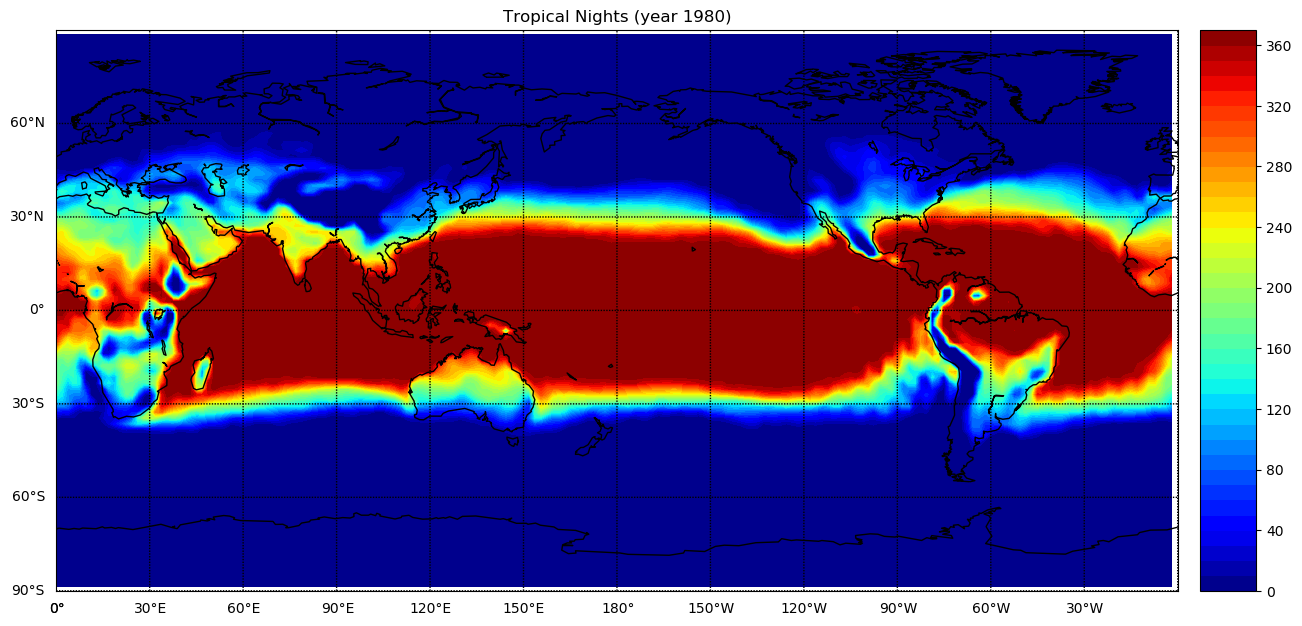

In [9]:
data = firstyear.export_array(show_time='yes')
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import numpy as np

lat = data['dimension'][0]['values'][:]
lon = data['dimension'][1]['values'][:]
var = data['measure'][0]['values'][:]
var = np.reshape(var, (len(lat), len(lon)))

fig = plt.figure(figsize=(15, 15), dpi=100)
ax  = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(projection='cyl',llcrnrlat= -90,urcrnrlat= 90, llcrnrlon=0,urcrnrlon=360, resolution='c')

map.drawcoastlines()
map.drawparallels(np.arange( -90, 90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

x, y = map(*np.meshgrid(lon,lat))

clevs = np.arange(0,371,10)

cnplot = map.contourf(x,y,var,clevs,cmap=plt.cm.jet)
cbar = map.colorbar(cnplot,location='right')

plt.title('Tropical Nights (year 1980)')
plt.show()